In [12]:
import pandas as pd
%matplotlib inline

# 1 limpieza y carga 

In [7]:
# 1 funcion para cargar data de hojas de excel
def dataframe(file, sheet, rows):
    df=pd.read_excel(file,            # archivo de excel
                    sheet_name=sheet, # hoja 
                    skiprows=rows)    # omitimos las filas del encabezado
    df['SHEET']=sheet  # creamos una columna para identificar la fuente de datos 
    return df
df = pd.DataFrame()
for s in ["GASTOS VARIOS",'CONTRATISTAS Y FDO FED', 'SERV PPROF', 'COMUNICACION', 'SERV. PERS.']:
    data = dataframe("data/12_DICIEMBRE_2020.xlsx", s, 5)
    df = pd.concat([df, data]) # unimos los df de todas las hojas 

In [9]:
print(df.shape)
df.head(2)

(1774, 11)


,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.8,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.8,GASTOS VARIOS


In [10]:
# 2 eliminamos las filas con valores null
df = df.dropna(how='any')
df.shape

(1540, 11)

In [11]:
# 3 guardamos la data limpia en formato CSV 
df.to_csv('data/clean_compras.csv', index=None) # no incluimos indices

# df_compras_dic_com['FECHA'].apply(lambda x: x.month).value_counts() # corroborar que todos los datos sean de diciembre 

# 2 exploracion 

In [15]:
cdf = pd.read_csv('data/clean_compras.csv')
cdf.head(2)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.8,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.8,GASTOS VARIOS


## 2.1 Visión general del dataset

In [17]:
cdf.columns # columnas

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [24]:
pd.DataFrame(cdf.dtypes).T # tipo de dato de cada columna, use transpuesta para mejor viz 

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,int64,object,object,object,object,object,object,float64,object,float64,object


In [20]:
cdf.describe() # analisis de variables numericas

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [26]:
# seleccionamos solo variables a utilizar, eliminamos las demas
cdf = cdf.drop(['NUM BEN', 'RFC'], axis=1)
cdf.head(2)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.8,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.8,GASTOS VARIOS


## 2.2 Análisis unidimensional de las variables

In [27]:
cdf['SHEET'].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

In [28]:
len(cdf['CONCEPTO'].unique())

1396

In [29]:
cdf['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

<AxesSubplot:>

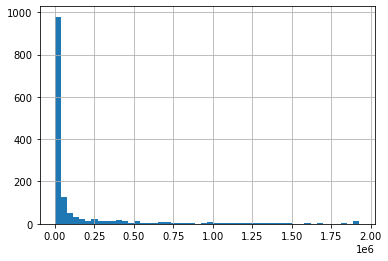

In [39]:
#cdf['IMPORTE'].hist()
# graficamos solo el 95% de los datos inferiores 
cdf[cdf['IMPORTE']< cdf['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50) 

## 2.3 Análisis multidimensional de las variables
usaremos repetidamente la funcion de group by para generar relaciones entre variables. crearemos tablas dinamicas y apartir de ahi graficaremos.

recuerda la logica de group by:

df.groupby('columna agregadora').operacion_sobre_datos_agrupados()

In [41]:
# veremos cuanto se le pagen total a cada benificiario
sum_importe_beneficiario = cdf.groupby('BENEFICIARIO').sum()['IMPORTE']

<AxesSubplot:ylabel='BENEFICIARIO'>

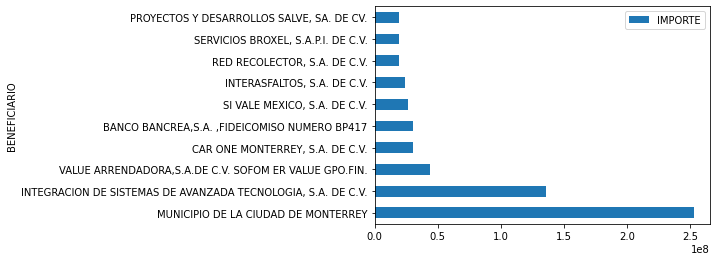

In [45]:
# creamos una grafica de los 10 empresas a las que mas dinero se les pago en total en el mes
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='barh', 
                                                                                                x='BENEFICIARIO', 
                                                                                                y='IMPORTE')

Dado que cada hoja de excel era un departamento donde se efectuaron pagos, podemos calcular la media de los pagos efectuado en cada departamento. y depues graficarlo 

In [46]:
mean_importe_sheet = cdf.groupby('SHEET').mean()['IMPORTE']

<AxesSubplot:ylabel='SHEET'>

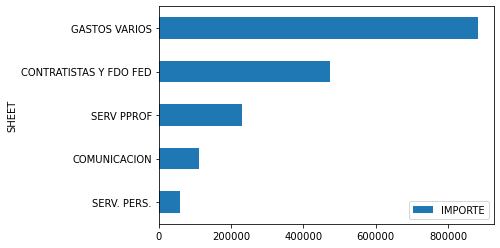

In [48]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=True).iloc[0:10].plot(kind='barh', 
                                                                                            x='SHEET', 
                                                                                            y='IMPORTE')

In [ ]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

In [49]:
# cuanto se gasto en cada dia 
sum_importe_fecha = cdf.groupby('FECHA').sum()["IMPORTE"] 

In [51]:
cdf[cdf['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

- stask(): convierte los indices internos de las columnas en indices internos de filas. 
- unstack(): convierte los indices internos de las filas  en indices internos de columnas. 

https://medium.com/swlh/reshaping-in-pandas-with-stack-and-unstack-functions-bb169f64467d

en este caso nos ayudara a convertir 

In [56]:
compras_sheet_beneficiario = cdf.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')
compras_sheet_beneficiario.head(3)

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.13
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.14
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [57]:
top_beneficiarios = cdf.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]
top_beneficiarios

Index(['MUNICIPIO DE LA CIUDAD DE MONTERREY',
       'INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.',
       'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.',
       'CAR ONE MONTERREY, S.A. DE C.V.',
       'BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417',
       'SI VALE MEXICO, S.A. DE C.V.', 'INTERASFALTOS, S.A. DE C.V.',
       'RED RECOLECTOR, S.A. DE C.V.', 'SERVICIOS BROXEL, S.A.P.I. DE C.V.',
       'PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.'],
      dtype='object', name='BENEFICIARIO')

<AxesSubplot:ylabel='BENEFICIARIO'>

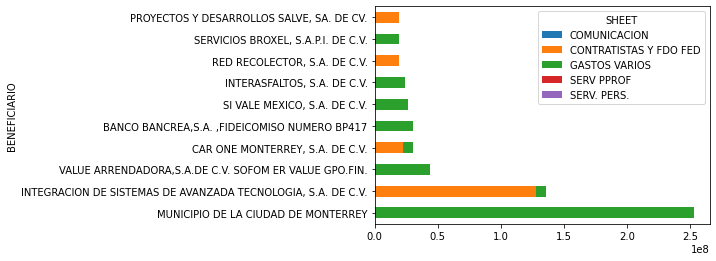

In [59]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.barh(stacked=True)

## 2.4 Análisis de texto
analizaremos las palabras usadas en contexto. grearemos una cloudword  sobre las palabaras mas usadas en concepto. se realizara en 3 pasos: 
1. guardamos todos los conceptos en forma de parrafo grande
2. creamos un diccionario de palabras a ignorar en el analisis con NLTK
3. 

In [70]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish')[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [71]:
# guardamos todos los conceptos en un parrafo 
textos_compras = ''
for row in cdf['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row

In [72]:
# definimos diccionario de palabras no deseadas 
stopwords_list = stopwords.words('spanish') + ['monterrey', 'municipio', '2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [73]:
# limpiamos stopwords
# strip quita los espacio de mas, lower convierte todo en minusculas
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# genermoas la imagen de nube de palabras 
wc = WordCloud(background_color= 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()